<a href="https://colab.research.google.com/github/linhv0/Finance-Projects/blob/main/Value_at_Risk_Covariance_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Value at Risk
- the potential amount of money that can be lost on a portfolio over a given period of time with a given level of confidence
- involves 3 components:
1. Define holding period - the time frame for risk to be assessed
2. Define level of confidence
3. Calculate the maxium loss

## Practical uses of VaR
- provides management with a clear and quantifiable measure of risk exposure associated with trading and investment operations
- establish limits on the size of positions can be taken on and resouces allocation
- evaluate the performance of trading and investement operations.

## Advantages of VaR
- standardized measure to quantify risk across different assets
- associates potential losses to probability which helps investors understand the likelihood of experiencing losses
- can be applied to all traded assets
- performance assessment

# Three ways to implement VaR for a portfolio
1. Historical Approach
2. Monte Carlo Simulation Approach
3. Covariance Approach (used below):
- assumes the returns of all assets are ***normally distributed***. Keep in mind, this can be a disadvantage of this implemetation as returns often exhibit fat tails, which leads to underestimation of risk.

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm


In [ ]:
#set a start date and end date
years = 15
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 365*years)

In [ ]:
#create a list of tickers
tickers = ['SPY', 'NVDA', 'KO', 'GOLD', 'JPM']

In [ ]:
adj_close_df = pd.DataFrame()

for ticker in tickers:
  data = yf.download(ticker, start=start_date, end=end_date)
  adj_close_df[ticker] = data['Adj Close']



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(adj_close_df)

                   SPY        NVDA         KO       GOLD         JPM
Date                                                                
2010-01-04   86.026459    0.423923  17.949804  31.370548   29.156553
2010-01-05   86.254158    0.430113  17.732662  31.758884   29.721323
2010-01-06   86.314911    0.432864  17.726377  32.434601   29.884611
2010-01-07   86.679245    0.424381  17.682312  31.976347   30.476603
2010-01-08   86.967712    0.425298  17.355040  32.178310   30.401743
...                ...         ...        ...        ...         ...
2024-12-20  591.150024  134.699997  62.549999  15.460000  237.600006
2024-12-23  594.690002  139.669998  62.380001  15.590000  238.389999
2024-12-24  601.299988  140.220001  62.840000  15.710000  242.309998
2024-12-26  601.340027  139.929993  62.570000  15.740000  243.139999
2024-12-27  593.299988  136.559998  62.480000  15.655000  240.699997

[3772 rows x 5 columns]


# Calculate the Daily Log Returns and Drop N/As

*Calculate log returns because they are additive overtime and better at handelling compounding.*

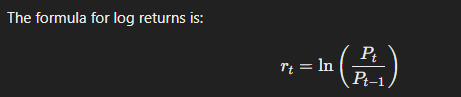

In [ ]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1)).dropna()
print(log_returns)

                 SPY      NVDA        KO      GOLD       JPM
Date                                                        
2010-01-05  0.002643  0.014497 -0.012171  0.012303  0.019185
2010-01-06  0.000704  0.006376 -0.000354  0.021053  0.005479
2010-01-07  0.004212 -0.019792 -0.002489 -0.014229  0.019616
2010-01-08  0.003322  0.002159 -0.018682  0.006296 -0.002459
2010-01-11  0.001396 -0.014115  0.020105  0.005055 -0.003362
...              ...       ...       ...       ...       ...
2024-12-20  0.011939  0.030299  0.001600  0.014989  0.019722
2024-12-23  0.005970  0.036232 -0.002721  0.008374  0.003319
2024-12-24  0.011054  0.003930  0.007347  0.007668  0.016310
2024-12-26  0.000067 -0.002070 -0.004306  0.001908  0.003420
2024-12-27 -0.013460 -0.024378 -0.001439 -0.005415 -0.010086

[3771 rows x 5 columns]


#Create an equally weighted portfolio

In [ ]:
portfolio = 500000
weights = np.array([1/len(tickers)] * 5)
print(weights)

[0.2 0.2 0.2 0.2 0.2]


# Calculate the historical portfolio returns

In [ ]:
historical_ret = (log_returns * weights).sum(axis=1) #calculate weighted average across 5 securities
print(historical_ret)

Date
2010-01-05    0.007291
2010-01-06    0.006652
2010-01-07   -0.002536
2010-01-08   -0.001873
2010-01-11    0.001816
                ...   
2024-12-20    0.015710
2024-12-23    0.010235
2024-12-24    0.009262
2024-12-26   -0.000196
2024-12-27   -0.010956
Length: 3771, dtype: float64


In [ ]:
days = 5 #holding period - the time frame for risk to be assessed
historical_5_day_ret = historical_ret.rolling(window=days).sum().dropna() #summing up 5 day returns
print(historical_5_day_ret)

Date
2010-01-11    0.011349
2010-01-12   -0.013825
2010-01-13   -0.010130
2010-01-14   -0.009009
2010-01-15   -0.026757
                ...   
2024-12-20   -0.023190
2024-12-23   -0.003120
2024-12-24    0.009093
2024-12-26    0.034991
2024-12-27    0.024054
Length: 3767, dtype: float64


# Calculate covariance matrix

In [ ]:
cov_matrix = log_returns.cov() * 252
print('Covariance Matrix:')
print(cov_matrix)

Covariance Matrix:
           SPY      NVDA        KO      GOLD       JPM
SPY   0.029253  0.048493  0.017492  0.011536  0.035048
NVDA  0.048493  0.203634  0.017009  0.017420  0.045582
KO    0.017492  0.017009  0.029199  0.007668  0.021018
GOLD  0.011536  0.017420  0.007668  0.149834  0.004635
JPM   0.035048  0.045582  0.021018  0.004635  0.076989


# Calculate portfolio standard deviation

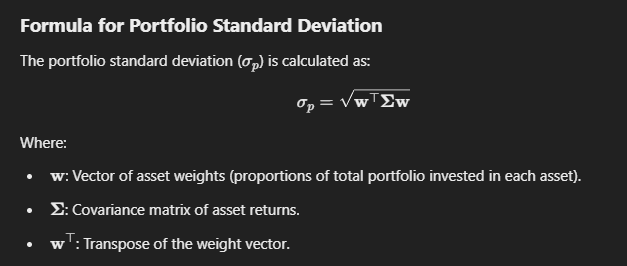

In [ ]:
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_std= np.sqrt(portfolio_variance)
print(portfolio_std)

0.19398062292579601


In [ ]:
#set confidence level
confidence_levels = [0.9, 0.95, 0.99]

# Calculate VaR at different confidence levels
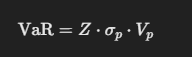

In [ ]:
from scipy.stats import norm

VaRs = []

for cl in confidence_levels:
  z_score = norm.ppf(1-cl) #z_score of potential loss
  volatility_5day_period = portfolio_std * np.sqrt(days/252)
  VaR = portfolio * volatility_5day_period *  z_score
  VaRs.append(VaR)


In [ ]:
print(VaRs)

[-17508.509302198163, -22471.928405000242, -31782.477184586973]


In [ ]:
df = pd.DataFrame({'Confidence Level': confidence_levels,'Value at Risk': VaRs})
df['Value at Risk'] = df['Value at Risk'].apply(lambda x: '${:,.2f}'.format(x))
df['Confidence Level'] = df['Confidence Level'].apply(lambda x: '{:.0%}'.format(x))
print(df)

  Confidence Level Value at Risk
0              90%   $-17,508.51
1              95%   $-22,471.93
2              99%   $-31,782.48


With 99% confidence interval and a portfolio of 500,000 dollars, you would expect to lose no more 31,782 dollars

In [ ]:
# Amount of returns in dollar values
historical_5_day_ret_dollars = historical_5_day_ret * portfolio
print(historical_5_day_ret_dollars)

Date
2010-01-11     5674.707198
2010-01-12    -6912.567854
2010-01-13    -5064.795821
2010-01-14    -4504.256846
2010-01-15   -13378.701082
                  ...     
2024-12-20   -11594.912438
2024-12-23    -1560.102857
2024-12-24     4546.631699
2024-12-26    17495.673077
2024-12-27    12027.031027
Length: 3767, dtype: float64


#Visualizations

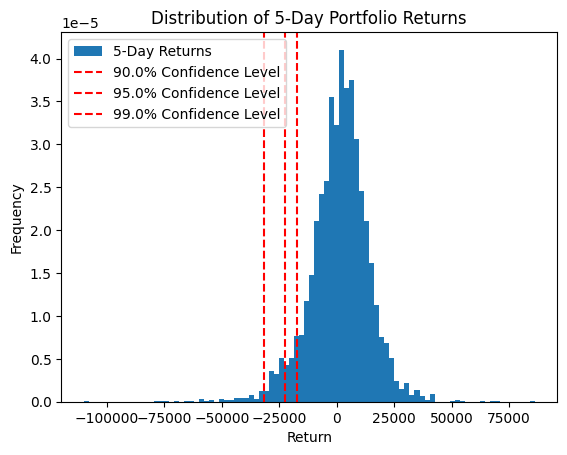

In [ ]:

# Plot the histogram
plt.hist(historical_5_day_ret_dollars, bins=90, density=True, label='5-Day Returns')

#Add title and x,y labels
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Distribution of 5-Day Portfolio Returns')

# Add vertical lines representing VaR at each confidence level
for cl, var in zip(confidence_levels, VaRs):
  plt.axvline(x=var, color='r', linestyle='--', label=f'{cl*100}% Confidence Level')
plt.legend()
plt.show()
